In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [352]:
df1 = pd.read_csv("/ExamExercises/Datasets/Ex1_Midrerm2/power_consumption_g1.csv")
df2 = pd.read_csv("/ExamExercises/Datasets/Ex1_Midrerm2/power_consumption_g1_feat.csv")

In [353]:
df1

,Datetime,PowerConsumption
0,2017-10-04 02:20:00,26802.27571
1,2017-05-28 13:20:00,32898.09836
2,2017-03-15 06:00:00,22304.68085
3,2017-10-31 11:40:00,32316.49891
4,2017-04-20 02:50:00,23982.43272
...,...,...
52411,2017-05-27 13:30:00,35000.65574
52412,2017-10-29 20:10:00,39425.12035
52413,2017-02-05 16:10:00,28751.18644
52414,2017-04-11 17:20:00,32098.51453


In [354]:
df2

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [355]:
df1["Datetime"] = pd.to_datetime(df1["Datetime"])
df2["Datetime"] = pd.to_datetime(df2["Datetime"])

In [356]:
df1.set_index(keys=["Datetime"], drop=True, inplace=True)
df2.set_index(keys=["Datetime"], drop=True, inplace=True)

df1 = df1.sort_index()
df2 = df2.sort_index()

In [357]:
df1

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [358]:
df2

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [359]:
df = pd.merge(left=df2, right=df1, left_on="Datetime", right_on="Datetime")

In [360]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [361]:
df = df.sort_index()

In [362]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [363]:
lag = 5

In [364]:
lags = range(lag, 0, -1)
print(list(lags))

[5, 4, 3, 2, 1]


In [365]:
features = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]

for feature in features:
    df[feature] = df[feature].interpolate(method="time")

In [366]:
df = df.groupby(pd.Grouper(freq="30min")).mean()

In [367]:
for lag in lags:
    for feature in features + ["PowerConsumption"]:
        df[f"{feature}_{lag}"] = df[feature].shift(lag)

In [368]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Temperature_5,Humidity_5,WindSpeed_5,GeneralDiffuseFlows_5,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,NaN,NaN,NaN,NaN,...,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,NaN,NaN,NaN,NaN,...,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,NaN,NaN,NaN,NaN,...,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787,9.710000,61.685000,0.075000,0.052667,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017,9.196667,63.106667,0.074333,0.051333,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743,8.933333,63.473333,0.074667,0.039333,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17472 entries, 2017-01-01 00:00:00 to 2017-12-30 23:30:00
Freq: 30min
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            17472 non-null  float64
 1   Humidity               17472 non-null  float64
 2   WindSpeed              17472 non-null  float64
 3   GeneralDiffuseFlows    17472 non-null  float64
 4   DiffuseFlows           17472 non-null  float64
 5   PowerConsumption       17472 non-null  float64
 6   Temperature_5          17467 non-null  float64
 7   Humidity_5             17467 non-null  float64
 8   WindSpeed_5            17467 non-null  float64
 9   GeneralDiffuseFlows_5  17467 non-null  float64
 10  DiffuseFlows_5         17467 non-null  float64
 11  PowerConsumption_5     17467 non-null  float64
 12  Temperature_4          17468 non-null  float64
 13  Humidity_4             17468 non-null  float64
 14  WindSpe

In [370]:
df.drop(columns=["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"], inplace=True)

In [371]:
df

,PowerConsumption,Temperature_5,Humidity_5,WindSpeed_5,GeneralDiffuseFlows_5,DiffuseFlows_5,PowerConsumption_5,Temperature_4,Humidity_4,WindSpeed_4,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,PowerConsumption_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,PowerConsumption_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,30999.493670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,27396.455697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 01:00:00,25407.594937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:30:00,23906.835443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 02:00:00,22474.936707,NaN,NaN,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,...,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,34786.311787,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,34660.583017,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,33326.235743,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [372]:
df.isnull().sum()

PowerConsumption         0
Temperature_5            5
Humidity_5               5
WindSpeed_5              5
GeneralDiffuseFlows_5    5
DiffuseFlows_5           5
PowerConsumption_5       5
Temperature_4            4
Humidity_4               4
WindSpeed_4              4
GeneralDiffuseFlows_4    4
DiffuseFlows_4           4
PowerConsumption_4       4
Temperature_3            3
Humidity_3               3
WindSpeed_3              3
GeneralDiffuseFlows_3    3
DiffuseFlows_3           3
PowerConsumption_3       3
Temperature_2            2
Humidity_2               2
WindSpeed_2              2
GeneralDiffuseFlows_2    2
DiffuseFlows_2           2
PowerConsumption_2       2
Temperature_1            1
Humidity_1               1
WindSpeed_1              1
GeneralDiffuseFlows_1    1
DiffuseFlows_1           1
PowerConsumption_1       1
dtype: int64

In [373]:
df.dropna(inplace=True)

In [374]:
X, y = df.drop(columns="PowerConsumption"), df["PowerConsumption"]

In [375]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=False)

In [376]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

In [377]:
train_y.shape

(11178,)

## Scaling Y using y_scaler / different than X

In [378]:
y_scaler = StandardScaler()

train_y = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
val_y = y_scaler.transform(val_y.values.reshape(-1, 1))
test_y = y_scaler.transform(test_y.values.reshape(-1, 1))

In [379]:
train_y.shape

(11178, 1)

In [380]:
train_X.shape

(11178, 30)

In [381]:
lag = 5

In [382]:
(train_X.shape[0], lag, train_X.shape[1] // lag)

(11178, 5, 6)

In [383]:
train_X = train_X.reshape(train_X.shape[0], lag, (train_X.shape[1] // lag))
val_X = val_X.reshape(val_X.shape[0], lag, (val_X.shape[1] // lag))
test_X = test_X.reshape(test_X.shape[0], lag, (test_X.shape[1] // lag))

In [384]:
train_X.shape

(11178, 5, 6)

In [385]:
train_X = torch.tensor(train_X, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)

val_X = torch.tensor(val_X, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)

test_X = torch.tensor(test_X, dtype=torch.float32)
test_y = torch.tensor(test_y, dtype=torch.float32)

In [386]:
train_y.shape

torch.Size([11178, 1])

In [387]:
train_X.shape

torch.Size([11178, 5, 6])

In [388]:
train_dataset = TensorDataset(train_X, train_y)
val_dataset = TensorDataset(val_X, val_y)
test_dataset = TensorDataset(test_X, test_y)

In [389]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [390]:
len(train_X[0])

5

In [391]:
class LSTMRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm1 = nn.LSTM(train_X.shape[2], 16, batch_first=True)
        self.lstm2 = nn.LSTM(16, 16, batch_first=True)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.relu(x)

        x, _ = self.lstm2(x)
        x = self.relu(x)

        x = x[:, -1, :]
        return self.fc(x)

In [392]:
def train(model, dataloader, loss_fn, optimizer):
    model.train()

    total_loss = 0
    for features, targets in dataloader:
        features, targets = features, targets

        optimizer.zero_grad()

        outputs = model(features)
        loss = loss_fn(outputs, targets)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss

In [393]:
def evaluate(model, dataloader, loss_fn):
    model.eval()

    total_loss, predictions = 0, []
    with torch.no_grad():
        for features, targets in dataloader:
            features, targets = features, targets

            outputs = model(features)
            loss = loss_fn(outputs, targets)

            predictions.extend(outputs.squeeze(1).tolist())

            total_loss += loss.item()

    return total_loss, predictions

In [394]:
def train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, num_epochs):
    train_losses, val_losses = [], []
    for epoch in range(1, num_epochs + 1):
        train_loss = train(model, train_loader, loss_fn, optimizer)
        train_losses.append(train_loss)
        val_loss, pred_y = evaluate(model, val_loader, loss_fn)
        val_losses.append(val_loss)

        mape = mean_absolute_percentage_error(val_y.tolist(), pred_y)

        if epoch % 2 == 0:
            print(f"Epoch {epoch:3d}/{num_epochs} | train_loss={train_loss:.4f} val_loss={val_loss:.4f} mape={mape:.4f}")

    return train_losses, val_losses

In [395]:
model = LSTMRegressor()
model

LSTMRegressor(
  (lstm1): LSTM(6, 16, batch_first=True)
  (lstm2): LSTM(16, 16, batch_first=True)
  (relu): ReLU()
  (fc): Linear(in_features=16, out_features=1, bias=True)
)

In [396]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [397]:
train_losses, val_losses = train_and_evaluate(model, train_loader, val_loader, loss_fn, optimizer, 20)

Epoch   2/20 | train_loss=40.5753 val_loss=6.7590 mape=0.9157
Epoch   4/20 | train_loss=11.4725 val_loss=2.4811 mape=0.3693
Epoch   6/20 | train_loss=6.5670 val_loss=1.4255 mape=0.2972
Epoch   8/20 | train_loss=5.3114 val_loss=1.1574 mape=0.2779
Epoch  10/20 | train_loss=4.9439 val_loss=1.0507 mape=0.2588
Epoch  12/20 | train_loss=4.7120 val_loss=1.0496 mape=0.2996
Epoch  14/20 | train_loss=4.5279 val_loss=1.0345 mape=0.3043
Epoch  16/20 | train_loss=4.3582 val_loss=1.0203 mape=0.3135
Epoch  18/20 | train_loss=4.2332 val_loss=1.0461 mape=0.3413
Epoch  20/20 | train_loss=4.1364 val_loss=1.0493 mape=0.3380


In [398]:
test_loss, pred_y = evaluate(model, test_loader, loss_fn)

<Axes: >

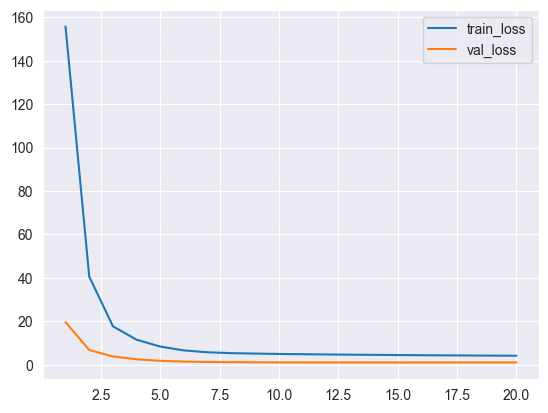

In [399]:
sns.lineplot(x=range(1, 20 + 1), y=train_losses, label="train_loss")
sns.lineplot(x=range(1, 20 + 1), y=val_losses, label="val_loss")

## Inverse scaling (unscaling) Y using the same scaler as scaling Y

In [400]:
pred_y = np.array(pred_y).reshape(-1, 1)

test_y = y_scaler.inverse_transform(test_y)
pred_y = y_scaler.inverse_transform(pred_y)

In [401]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 889.8059022312403
MAPE: 0.03176264173393766
MSE: 1237680.6422378896
RMSE: 1112.5109627495315
R2 Score: 0.9673028803306729
